In [100]:
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

import pandas as pd
import random
import os
from tabulate import tabulate
#np.set_printoptions(threshold=np.nan)
#%matplotlib inline


# Variables

die_roll = 0
die_type = 6
die_payout = die_type
player_bet = 0
player_pick = 0
player_win = 0
player_purse = 100
round = 0
counter = 0
rounds_played = 1000


# Keeping track and initialize lists

#turn_list.clear()
#purse_list.clear()
#bet_list.clear()
#win_loss_list.clear()
#rolled_number_list.clear()
#picked_number_list.clear()

round_list = [0]
turn_list = [0]
purse_list =[100]
bet_list = [0]
win_loss_list = [0]
rolled_number_list = [0]
picked_number_list = [0]
winner_list = [0]

track = {'Round':round_list,'Turns':turn_list,'Purse':purse_list, 'Bet':bet_list, 'Win_Loss':win_loss_list, 'Rolled_Number':rolled_number_list,
'Picked_Number':picked_number_list, 'Winner':winner_list}

for j in range(1,rounds_played):
    round = round +1
    counter = 0
    player_purse = 100

    while player_purse > 0:
        round_list.append(round)
        counter = counter +1
        turn_list.append(counter)
        die_roll = random.randint(1,6)
        rolled_number_list.append(die_roll)
        player_bet = random.randint(0,player_purse)
        bet_list.append(player_bet)
        player_pick = random.randint(1,6)
        picked_number_list.append(player_pick)
        if player_pick == die_roll:
            winner_list.append(True)
            player_win = player_bet * die_payout
        else:
            player_win = -1 * player_bet
            winner_list.append(False)
        win_loss_list.append(player_win)
        player_purse = player_purse + player_win
        purse_list.append(player_purse)
        if player_purse == 0:
            break

    
            
#Tabular Results 
header = track.keys()
print(tabulate(track, headers=['Round','Turn', 'Purse', 'Bet', 'Win/Loss', 'Rolled_Number', 'Picked_Number', 'Winner']))
print(tabulate(track, headers=header))

df = pd.DataFrame.from_dict(track)


round_high = df.groupby('Round')['Purse'].max()
tops = round_high.max()
high_round = round_high[round_high == tops].index[0]
newdf1 = df.loc[:,["Round","Purse","Win_Loss", "Turns"]]
newdf2 = newdf1.loc[newdf1["Round"] == high_round]

#print(df["Round"] == high_round)
#print(high_round)

  Round    Turn    Purse    Bet    Win/Loss    Rolled_Number    Picked_Number    Winner
-------  ------  -------  -----  ----------  ---------------  ---------------  --------
      0       0      100      0           0                0                0         0
      1       1       55     45         -45                4                1     False
      1       2       20     35         -35                3                6     False
      1       3        3     17         -17                6                1     False
      1       4        0      3          -3                6                3     False
      2       1        1     99         -99                3                6     False
      2       2        0      1          -1                2                1     False
      3       1      196     16          96                5                5      True
      3       2      158     38         -38                5                3     False
      3       3      123     35 

  Round    Turns    Purse    Bet    Win_Loss    Rolled_Number    Picked_Number    Winner
-------  -------  -------  -----  ----------  ---------------  ---------------  --------
      0        0      100      0           0                0                0         0
      1        1       55     45         -45                4                1     False
      1        2       20     35         -35                3                6     False
      1        3        3     17         -17                6                1     False
      1        4        0      3          -3                6                3     False
      2        1        1     99         -99                3                6     False
      2        2        0      1          -1                2                1     False
      3        1      196     16          96                5                5      True
      3        2      158     38         -38                5                3     False
      3        3     

In [82]:
#print(newdf2.loc[newdf2["Round"] == high_round])

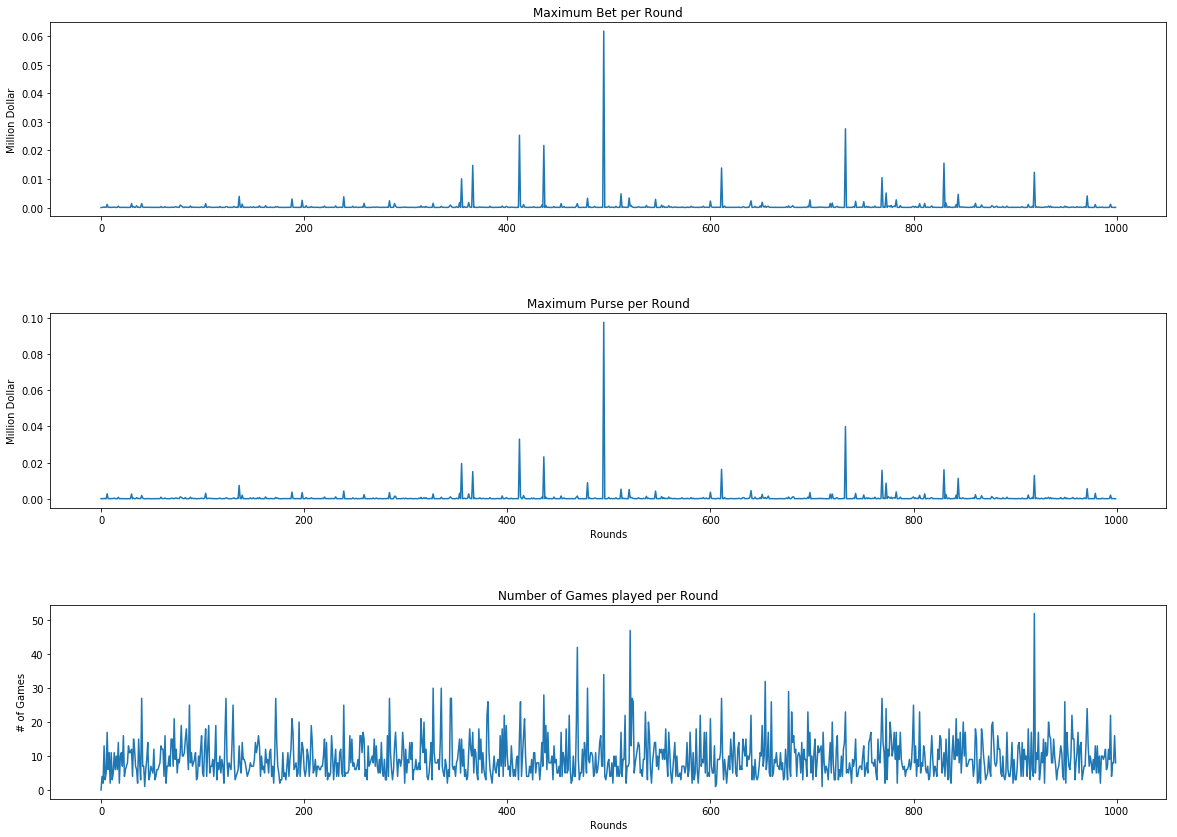

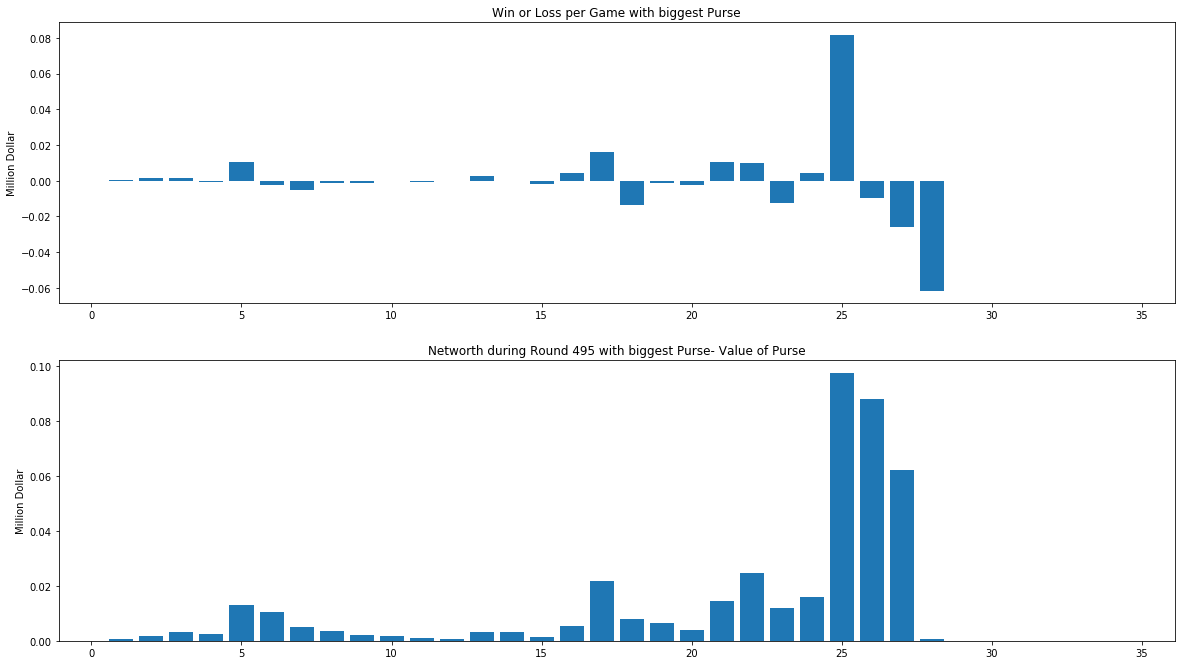

In [101]:
x1 = df["Round"].unique()
x2 = newdf2["Turns"]

y1 = df.groupby("Round")["Bet"].max() / 1000000
y2 = df.groupby("Round")["Purse"].max() / 1000000
y3 = df.groupby("Round")["Turns"].max()
y4 = newdf2["Win_Loss"] / 1000000
y5 = newdf2["Purse"] / 1000000


f = plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=0.5)
#y1.ticklabel_format(style='plain')

plt.subplot(5,1,1)
plt.plot(x1,y1)
plt.title("Maximum Bet per Round")
plt.ylabel("Million Dollar")
plt.ticklabel_format(style='plain')


plt.subplot(5,1,2)
plt.plot(x1,y2)
plt.title("Maximum Purse per Round")
plt.ylabel("Million Dollar")
plt.xlabel("Rounds")
plt.ticklabel_format(style='plain')


plt.subplot(5,1,3)
plt.plot(x1,y3)
plt.title("Number of Games played per Round")
plt.ylabel("# of Games")
plt.xlabel("Rounds")

f = plt.figure(figsize=(20,30))

plt.subplot(5,1,4)
plt.bar(x2,y4)
plt.title("Win or Loss per Game with biggest Purse")
plt.ylabel("Million Dollar")
plt.ticklabel_format(style='plain')


plt.subplot(5,1,5)
plt.bar(x2,y5)
plt.title(f"Networth during Round {high_round} with biggest Purse- Value of Purse")
plt.ylabel("Million Dollar")
plt.ticklabel_format(style='plain')



plt.show()


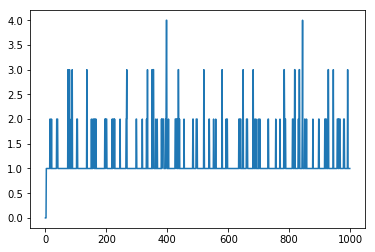

In [103]:
streak = 0
max_streaks = 0
list = [0]
my_rounds = range(1,1000+1)
for round in range(1,1000):
    x = df.loc[df['Round'] == round,'Winner'].values[::]
    for i in x:
        if i == True:
            streak = streak + 1
            max_streaks = streak
        elif i == False:
            streak = 0
    list.append(max_streaks)
    streak = 0

newdf = pd.DataFrame()
newdf['Longest_Streak'] = list
newdf['Round'] = my_rounds
x = df["Round"].unique()
plt.plot(newdf['Longest_Streak'])